<a href="https://colab.research.google.com/github/lizjwh/groupIAI_5take2/blob/main/4%20Training%20and%20testing%20OG%20Model%20on%20our%20dataset/ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.2. Fetching data

In this section, we will get the required missing packages, download, and unzip the dataset.

### Get Kaggle CLI and torch vision package

First, we will need to install Kaggle CLI and torch vision package, For that, we use the exclamation mark to run command in the kernel.

In [ ]:
#Deleat folders if we want a refresh
'''
import shutil

shutil.rmtree('Full Mobility', ignore_errors=True)
'''

"\nimport shutil\n\nshutil.rmtree('Full Mobility', ignore_errors=True)\n"

In [ ]:
#install torchvision and kaggle
!pip install torchvision
!pip install kaggle
!pip install tqdm
!pip install colorama
!pip install split-folders[full]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.7 MB/s eta 0:00:00


### Download and unzip the dataset

We will use a dataset of 87.0k ASL Alphabet images (JPG) and 29 categories (26 ASL alphabet, space, Del, and nothing) offered by amarinderplasma on Kaggle. For more about the dataset <a href="https://www.kaggle.com/amarinderplasma/alphabets-sign-language"> ASL Images.</a>

* In this cell you should import your Kaggle account credentials to be able to download the data through Kaggle CLI. To get your credentials <a href="https://www.kaggle.com/docs/api">Kaggle API key.</a>
* Please note the line should be run as it is as one line to make sure all commands are started in the same kernel.

In [ ]:
# download dataset and extract it
! export KAGGLE_USERNAME="emmet454" && export KAGGLE_KEY="ee00fbc0728a71f5c5f712029e3ef004" && kaggle datasets download --force --unzip emilyburt/intro-to-ai
! ls

100% 4.08G/4.08G [03:21<00:00, 23.5MB/s]
100% 4.08G/4.08G [03:21<00:00, 21.7MB/s]
Dataset  sample_data


### Split dataset into train, validate and test

In [ ]:
import splitfolders

In [ ]:
input_folder = 'Dataset/Full Mobility/Left hand'

#split with a ratio (train, val, test)
splitfolders.ratio(input_folder, output='Full Mobility/Left hand/',
                  seed=42, ratio=(.6, .20, .20),
                  group_prefix=None)

input_folder = 'Dataset/Full Mobility/Right hand'

#split with a ratio
splitfolders.ratio(input_folder, output='Full Mobility/Right hand/',
                  seed=42, ratio=(.6, .20, .20),
                  group_prefix=None)

input_folder = 'Dataset/Restricted mobility/Left hand'

#split with a ratio
splitfolders.ratio(input_folder, output='Restricted Mobility/Left hand/',
                  seed=42, ratio=(.6, .20, .20),
                  group_prefix=None)

input_folder = 'Dataset/Restricted mobility/Right hand'

#split with a ratio
splitfolders.ratio(input_folder, output='Restricted Mobility/Right hand/',
                  seed=42, ratio=(.6, .20, .20),
                  group_prefix=None)


Copying files: 492 files [00:04, 118.53 files/s]
Copying files: 502 files [00:04, 112.34 files/s]
Copying files: 484 files [00:04, 100.28 files/s]
Copying files: 495 files [00:04, 104.13 files/s]


# 3. Process and load images

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from torchvision import transforms, models ,datasets
from torch.utils.data import ConcatDataset

def create_dataset(root_dir):
    """
    Creates an ImageFolder dataset from the specified root directory.
    """
    data_transforms = transforms.Compose([transforms.Resize((224, 224)),
                                          transforms.ToTensor(),
                                          transforms.RandomRotation(30),
                                          transforms.RandomHorizontalFlip(p=0.3),
                                          transforms.Normalize([0.485, 0.456, 0.406],
                                                               [0.229, 0.224, 0.225])])
    dataset = datasets.ImageFolder(root_dir, transform=data_transforms)
    return dataset

def combine_datasets(root_folders):
    """
    Combines datasets from multiple root folders into one dataset.
    """
    datasets = [create_dataset(folder) for folder in root_folders]
    combined_dataset = ConcatDataset(datasets)

    # Extract class-to-index mappings from individual datasets and merge them
    class_to_idx = {}
    for dataset in datasets:
        class_to_idx.update(dataset.class_to_idx)

    return combined_dataset, class_to_idx


def main():
  #choose which folders to include in test here
    root_folders = ['/content/Restricted Mobility/Left hand/train',
                    '/content/Restricted Mobility/Right hand/train',
                    '/content/Full Mobility/Left hand/train',
                    '/content/Full Mobility/Right hand/train']

    combined_dataset, combined_dataset.class_to_idx = combine_datasets(root_folders)

    print(f"Class to index mapping: {combined_dataset.class_to_idx}")
    return combined_dataset

def main_val():
  #choose which folders to include in test here
    root_folders = ['/content/Restricted Mobility/Left hand/val',
                    '/content/Restricted Mobility/Right hand/val',
                    '/content/Full Mobility/Left hand/val',
                    '/content/Full Mobility/Right hand/val']

    combined_dataset, combined_dataset.class_to_idx = combine_datasets(root_folders)

    print(f"Class to index mapping: {combined_dataset.class_to_idx}")
    return combined_dataset

def main_test():
  #choose which folders to include in test here
    root_folders = ['/content/Restricted Mobility/Left hand/test',
                    '/content/Restricted Mobility/Right hand/test',
                    '/content/Full Mobility/Left hand/test',
                    '/content/Full Mobility/Right hand/test']

    combined_dataset, combined_dataset.class_to_idx = combine_datasets(root_folders)

    print(f"Class to index mapping: {combined_dataset.class_to_idx}")
    return combined_dataset

combined_train_dataset = main()
combined_val_dataset = main_val()
combined_test_dataset = main_test()

Class to index mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'Space': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
Class to index mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'Space': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
Class to index mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'Space': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


# 4. Customize our network

## 4.1. Choose a Pretrained model
choose a pre-trained model you think would have good accuracy for the problem and freeze all layers to make sure not all the network is trained during the training process.   
A list of Pytorch model zoo can be found <a href="https://pytorch.org/docs/stable/torchvision/models.html">here.</a>  
We will also print the model classifier to check the number of input neurons to consider when creating our classifier.

In [ ]:
# choose a pretrained model to start with check options here: https://pytorch.org/vision/stable/models.html
model = models.mobilenet_v2(pretrained=True)

# Freeze parameters of the tarined network
for param in model.parameters():
    param.requires_grad = False

#print the model to check the classifer and change it
print (model.classifier)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 159MB/s]

Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)


## 4.2. Choose which layers to train
In the next cell, we will unfreeze some of the last blocks of our network and we will define our custom classifier to have 29 outputs then we will attach it to the model.  
We will also choose the optimizer we want and define the learning rate for it.

In [ ]:
# define new classifier and append it to network but remember to have a 29-neuron output layer for our two classes.
model.classifier= nn.Sequential(nn.Dropout(p=0.6, inplace=False),
                                nn.Linear(in_features=1280, out_features=29, bias=True),
                                nn.LogSoftmax(dim=1))

# unlock last three blocks before the classifier(last layer).
for p in model.features[-3:].parameters():
    p.requires_grad = True


# choose your loss function
criterion = nn.NLLLoss()

# define optimizer to train only the classifier and the previous three block.
optimizer = optim.Adam([{'params':model.features[-1].parameters()},
                        {'params':model.features[-2].parameters()},
                        {'params':model.features[-3].parameters()},
                        {'params':model.classifier.parameters()}], lr=0.0005)

# define Learning Rate scheduler to decrease the learning rate by multiplying it by 0.1 after each epoch on the data.
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

#print the classifier now
print(model.classifier)

#print the whole model
# print(model)


Sequential(
  (0): Dropout(p=0.6, inplace=False)
  (1): Linear(in_features=1280, out_features=29, bias=True)
  (2): LogSoftmax(dim=1)
)


Load the weights of the trained model

In [ ]:
!git clone https://github.com/lizjwh/groupIAI_5take2
device = torch.device("cuda")
model.load_state_dict(torch.load('groupIAI_5take2/new_model3.pth'))
model.to(device)
model.eval()

Cloning into 'groupIAI_5take2'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 443 (delta 146), reused 180 (delta 97), pack-reused 181
Receiving objects: 100% (443/443), 112.32 MiB | 25.14 MiB/s, done.
Resolving deltas: 100% (219/219), done.


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

#Confusion Matrix
https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def test(classes, test_loader):
    pred = []
    true = []

    with torch.no_grad():
        # Iterate through all batches in the test_loader
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass through the model
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Convert predicted and true labels to class names
            try:
                pred.extend([classes[label.item()] for label in predicted])
                true.extend([classes[label.item()] for label in labels])
                #print(pred, true)
            except KeyError as e:
                print(f"Error: {e} not found in classes dictionary.")
                print(f"Problematic labels: {predicted}, {labels}")

    return pred, true

#invert class_to_idx keys to values and vice versa.
classes = combined_test_dataset.class_to_idx
classes = {value: key for key, value in classes.items()}

pred, true = test(classes, test_loader)
print(pred, true)

Error: 27 not found in classes dictionary.
Problematic labels: tensor([27,  2,  6, 16, 13,  4,  4, 18,  4,  7,  0, 16,  1,  4,  1, 16,  3,  2,
        15, 14, 16, 13,  7,  7,  4, 13,  0,  4, 19,  4, 13, 16],
       device='cuda:0'), tensor([26, 26, 26, 26,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5],
       device='cuda:0')
Error: 27 not found in classes dictionary.
Problematic labels: tensor([19, 13, 27, 16, 13,  1, 16, 15, 16, 13,  2, 14, 14, 15, 15,  2, 16, 15,
        15,  1, 15, 11,  2, 16, 16, 15,  1, 16,  1,  7, 19, 13],
       device='cuda:0'), tensor([11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15,
        15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18],
       device='cuda:0')
Error: 28 not found in classes dictionary.
Problematic labels: tensor([ 0,  4, 18, 19, 15,  2, 28,  3, 19, 16, 11, 19, 19, 19, 15, 16,  7, 11,
         1, 15, 11, 22,  5, 14, 22, 16,  1, 22,  1, 1

Number of images predicted: 334
{'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D', 'E': 'E', 'F': 'F', 'G': 'G', 'H': 'H', 'I': 'I', 'J': 'J', 'K': 'K', 'L': 'L', 'M': 'M', 'N': 'N', 'O': 'O', 'P': 'P', 'Q': 'Q', 'R': 'R', 'S': 'S', 'Space': 'Space', 'T': 'T', 'U': 'U', 'V': 'V', 'W': 'W', 'X': 'X', 'Y': 'Y', 'Z': 'Z'}


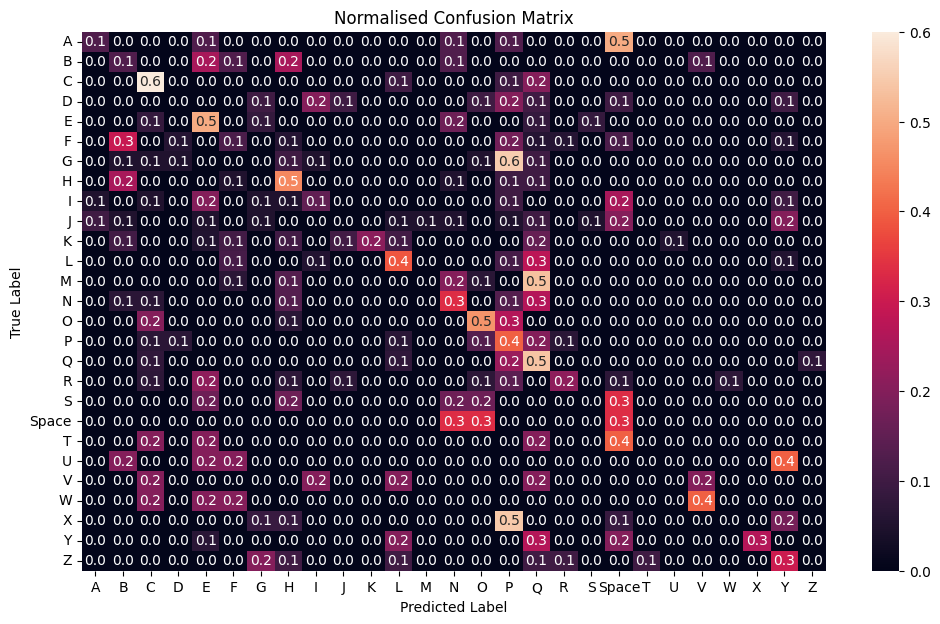

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

def plotConfusionMatrix(pred, true, classes):
    # Change classes dictionary to this format {'A': 'A', 'B': 'B', 'C': 'C'...} for labelling the axis later
    classes = {value: value for key, value in classes.items()}

    # Convert class_to_idx dictionary to list of class names
    unique_classes = sorted(set(true + pred))

    # Ensure that all classes are included, even if they are not present in the batch of data
    all_classes = sorted(set(classes.values()))

    # Create confusion matrix
    cf_matrix = confusion_matrix(
        [classes[label] for label in true],
        [classes[label] for label in pred],
        labels=all_classes
    )

    # Create DataFrame using class names for index and columns
    df_cm = pd.DataFrame(cf_matrix, index=all_classes, columns=all_classes)

    # Normalize the confusion matrix by row (i.e., by the number of true instances for each class)
    df_cm = df_cm.div(df_cm.sum(axis=1), axis=0)

    # Add 0s to empty cells
    df_cm = df_cm.fillna(0)
    #print(df_cm)

    plt.figure(figsize=(12, 7))
    print(classes)
    sn.heatmap(df_cm, annot=True, fmt=".1f")  # Adjust fmt as needed for displaying float values
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Normalised Confusion Matrix')
    plt.show()

# # #To run this cell independently you need these lines and some sample predictions
# classes = combined_dataset.class_to_idx
# classes = {value: key for key, value in classes.items()}
# pred = ['A', 'M', 'K', 'I', 'Space', 'M', 'K', 'L', 'O', 'M', 'A', 'S', 'P', 'D', 'D', 'O', 'Space', 'A', 'B', 'V', 'Space', 'N', 'B', 'E', 'A', 'S', 'C', 'U', 'K', 'Z', 'X', 'Z', 'G', 'Z', 'J', 'A', 'X', 'G', 'A', 'Q', 'C', 'D', 'M', 'A', 'R', 'A', 'I', 'W', 'E', 'I', 'A', 'M', 'A', 'T', 'K', 'E', 'O', 'O', 'E', 'I', 'K', 'F', 'C', 'F', 'Z', 'E', 'E', 'S', 'J', 'Q', 'I', 'U', 'X', 'H', 'R', 'H', 'C', 'T', 'R', 'P', 'Space', 'I', 'J', 'B', 'N', 'H', 'M', 'Y', 'Y', 'E', 'G', 'O', 'Space', 'Space', 'C', 'G', 'T', 'V', 'M', 'J', 'A', 'W', 'G', 'P', 'H', 'Space', 'L', 'B', 'G', 'Y', 'Space', 'O', 'D', 'P', 'J', 'K', 'T', 'J', 'U', 'D', 'A', 'M', 'V', 'T', 'L', 'Q', 'L', 'C', 'E', 'T', 'H', 'R', 'I', 'R', 'R', 'N', 'C', 'Y', 'X', 'U', 'H', 'B', 'O', 'W', 'H', 'W', 'R', 'I', 'U', 'U', 'T', 'U', 'Q', 'J', 'M', 'F', 'X', 'R', 'Z', 'T', 'Q', 'R', 'Q', 'N', 'B', 'P', 'A', 'V', 'B', 'X', 'U', 'J', 'J', 'T', 'L', 'E', 'Space', 'C', 'E', 'D', 'T', 'E', 'U', 'N', 'O', 'T', 'R', 'E', 'G', 'J', 'Q', 'F', 'D', 'I', 'O', 'A', 'V', 'U', 'J', 'H', 'S', 'C', 'N', 'F', 'U', 'K', 'N', 'Space', 'H', 'E', 'W', 'L', 'F', 'Q', 'P', 'O', 'B', 'J', 'R', 'X', 'A', 'N', 'W', 'B', 'C', 'D', 'U', 'T', 'W', 'H', 'N', 'U', 'R', 'G', 'A', 'L', 'H', 'B', 'M', 'J', 'G', 'T', 'F', 'M', 'S', 'S', 'L', 'X', 'P', 'G', 'I', 'Q', 'R', 'J', 'P', 'Q', 'F', 'K', 'R', 'G', 'N', 'A', 'L', 'B', 'J', 'G', 'W', 'L', 'V', 'M', 'X', 'Y', 'J', 'P', 'L', 'A', 'F', 'V', 'S', 'Y', 'Z', 'R', 'Z', 'A', 'G', 'U', 'O', 'K', 'P', 'C', 'I', 'R', 'Y', 'C', 'B', 'W', 'J', 'I', 'R', 'B', 'P', 'Z', 'H', 'V', 'J', 'R', 'K', 'H', 'L', 'F', 'C', 'Q', 'G', 'V', 'Q', 'V', 'I', 'Q', 'F', 'N', 'Space', 'H', 'J', 'C', 'K', 'M', 'M', 'K', 'P', 'X', 'P', 'B', 'O', 'I', 'G', 'W', 'W', 'B', 'G', 'G', 'U', 'Space', 'M', 'I', 'I', 'O', 'P', 'D', 'C', 'A', 'E', 'R', 'Y', 'Space', 'I', 'M', 'V', 'R', 'Y', 'W', 'F', 'N', 'Y', 'I', 'T', 'F', 'E', 'X', 'N', 'R', 'S', 'Y', 'Z', 'R', 'X', 'T', 'P', 'B', 'E', 'K', 'K', 'M', 'S', 'F', 'H', 'Z', 'W', 'M', 'N', 'H', 'A', 'E', 'P', 'J', 'Z', 'Space', 'W', 'B', 'Y', 'C', 'T', 'Z', 'A', 'X', 'S', 'M', 'E', 'Z', 'T', 'P', 'Space', 'Z', 'H', 'V', 'Z', 'L', 'Y', 'E', 'C', 'E', 'Z', 'X', 'E', 'O', 'R', 'N', 'R', 'A', 'F', 'Y', 'Y', 'A', 'E', 'W', 'S', 'B', 'S', 'X', 'F', 'Y', 'Z', 'T', 'C', 'U', 'R', 'K', 'T', 'E', 'H', 'O', 'U', 'V', 'O', 'Z', 'D', 'M', 'Q', 'W', 'G', 'Z', 'W', 'H', 'V', 'N', 'T', 'N', 'Z', 'B', 'S', 'Space', 'Y', 'N', 'J', 'Space', 'G', 'E', 'O', 'K', 'A', 'I', 'R', 'E', 'H', 'S', 'Y', 'N', 'W', 'T', 'I', 'E', 'W', 'U', 'V', 'T', 'Q', 'V', 'P', 'P', 'A', 'H', 'S', 'W', 'U', 'S', 'T', 'O', 'O', 'B', 'F', 'T', 'V', 'J', 'Y', 'X', 'J', 'P', 'L', 'O', 'Q', 'F', 'P', 'U', 'G', 'X', 'Q', 'Y', 'Space', 'D', 'R', 'A', 'J', 'T', 'Z', 'Space', 'S', 'P', 'I', 'R', 'G', 'T', 'I', 'Q', 'Space', 'X', 'V', 'R', 'P', 'H', 'M', 'F', 'B', 'G', 'C', 'Q', 'P', 'Z', 'P', 'E', 'O', 'Z', 'P', 'Space', 'U', 'H', 'Y', 'Y', 'E', 'X', 'G', 'I', 'Z', 'U', 'M', 'Q', 'X', 'O', 'J', 'C', 'P', 'Y', 'O', 'G', 'Z', 'J', 'N', 'K', 'I', 'Y', 'I', 'C', 'K', 'Q', 'J', 'D', 'W', 'X', 'Y', 'F', 'U', 'S', 'U', 'F', 'K', 'Z', 'H', 'L', 'A', 'L', 'F', 'A', 'I', 'A', 'Z', 'L', 'B', 'L', 'F', 'R', 'A', 'B', 'Q', 'S', 'Space', 'W', 'P', 'D', 'G', 'R', 'U', 'L', 'I', 'E', 'N', 'S', 'A', 'D', 'H', 'X', 'A', 'W', 'Q', 'K', 'E', 'J', 'M', 'M', 'K', 'D', 'Space', 'Space', 'H', 'Y', 'C', 'E', 'D', 'B', 'S', 'J', 'T', 'U', 'T', 'W', 'A', 'H', 'T', 'J', 'J', 'D', 'N', 'M', 'A', 'O', 'D', 'V', 'Space', 'J', 'M', 'D', 'J', 'P', 'H', 'T', 'U', 'X', 'Z', 'Z', 'Space', 'B', 'H', 'L', 'D', 'N', 'C', 'P', 'D', 'Q', 'Space', 'C', 'V', 'F', 'U', 'I', 'T', 'X', 'D', 'A', 'K', 'O', 'S', 'N', 'I', 'Space', 'U', 'Q', 'Y', 'C', 'S', 'G', 'E', 'L', 'K', 'Y', 'S', 'G', 'A', 'N', 'S', 'Y', 'K', 'S', 'K', 'V', 'V', 'Y', 'H', 'I', 'K', 'M', 'C', 'T', 'C', 'B', 'X', 'L', 'K', 'H', 'U', 'W', 'D', 'T', 'W', 'E', 'W', 'H', 'J', 'E', 'K', 'X', 'V', 'U', 'C', 'T', 'S', 'N', 'Space', 'K', 'C', 'Space', 'A', 'E', 'B', 'D', 'Q', 'Z', 'X', 'C', 'F', 'Space', 'O', 'N', 'A', 'I', 'D', 'K', 'K', 'V', 'Z', 'M', 'Space', 'P', 'P', 'J', 'L', 'J', 'X', 'Z', 'M', 'G', 'L', 'M', 'O', 'D', 'Space', 'S', 'R', 'T', 'Space', 'X', 'R', 'N', 'X', 'F', 'B', 'I', 'I', 'L', 'X', 'X', 'D', 'H', 'A', 'D', 'C', 'H', 'U', 'E', 'V', 'L', 'U', 'V', 'R', 'F', 'H', 'A', 'K', 'F', 'E', 'Space', 'V', 'Q', 'O', 'S', 'O', 'X', 'K', 'Q', 'P', 'F', 'A', 'N', 'I', 'I', 'U', 'G', 'C', 'P', 'C', 'W', 'A', 'M', 'W', 'W', 'F', 'A', 'X', 'J', 'R', 'H', 'S', 'T', 'P', 'L', 'U', 'Y', 'W', 'K', 'W', 'B', 'C', 'F', 'B', 'Space', 'D', 'B', 'Space', 'J', 'X', 'T', 'N', 'Space', 'M', 'F', 'L', 'C', 'X', 'D', 'E', 'M', 'J', 'S', 'W', 'I', 'X', 'E', 'W', 'G', 'B', 'M', 'C', 'E', 'I', 'R', 'J', 'Q', 'I', 'B', 'N', 'E', 'F', 'T', 'R', 'J', 'B', 'C', 'E', 'O', 'H', 'A', 'V', 'Z', 'O', 'N', 'X', 'G', 'A', 'N', 'W', 'Y', 'P', 'I', 'B', 'O', 'B', 'H', 'P', 'L', 'T', 'Q', 'E', 'V', 'M', 'I', 'N', 'Q', 'I', 'H', 'N', 'E', 'U', 'T', 'P', 'G', 'Space', 'J', 'H', 'S', 'Y', 'V', 'P', 'A', 'C', 'G', 'C', 'O', 'V', 'N', 'O', 'U', 'U', 'A', 'Z', 'Y', 'D', 'R', 'W', 'F', 'Y', 'Q', 'I', 'F', 'T', 'E', 'Y', 'G', 'A', 'F', 'L', 'O', 'Z', 'J', 'V', 'W', 'S', 'P', 'R', 'W', 'B', 'Space', 'N', 'N', 'X', 'F', 'Z', 'Space', 'O', 'K', 'K', 'G', 'B', 'Y', 'M', 'X', 'R', 'V', 'Y', 'E', 'Z', 'N', 'A', 'X', 'M', 'Q', 'V', 'I', 'T', 'E', 'A', 'Q', 'O', 'E', 'U', 'F', 'J', 'V', 'S', 'S', 'J', 'O', 'P', 'K', 'A', 'X', 'G', 'P', 'N', 'M', 'Z', 'T', 'T', 'H', 'D', 'O', 'V', 'X', 'T', 'Q', 'D', 'S', 'Q', 'M', 'D', 'R', 'G', 'W', 'W', 'F', 'R', 'K', 'Space', 'L', 'P', 'L', 'V', 'J', 'N', 'G', 'B', 'U', 'Space', 'P', 'M', 'T', 'A', 'R', 'Y', 'B', 'A', 'Q', 'S', 'D', 'A', 'J', 'U', 'B', 'G', 'B', 'H', 'V', 'N', 'H', 'S', 'G', 'K', 'Space', 'R', 'M', 'K', 'Space', 'J', 'S', 'O', 'W', 'Q', 'Q', 'L', 'C', 'G', 'G', 'N', 'M', 'F', 'E', 'Q', 'R', 'G', 'P', 'F', 'V', 'E', 'B', 'D', 'A', 'E', 'Y', 'F', 'A', 'L', 'E', 'C', 'Z', 'I', 'P', 'F', 'G', 'C', 'R', 'Q', 'A', 'W', 'D', 'G', 'T', 'D', 'F', 'G', 'M', 'I', 'G', 'B', 'L', 'H', 'M', 'V', 'Space', 'B', 'V', 'I', 'C', 'Q', 'W', 'F', 'D', 'Z', 'R', 'E', 'X', 'O', 'F', 'U', 'T', 'D', 'J', 'P', 'I', 'R', 'J', 'D', 'G', 'L', 'Y', 'A', 'L', 'O', 'Z', 'A', 'B', 'Y', 'N', 'A', 'Space', 'C', 'E', 'C', 'C', 'A', 'X', 'E', 'K', 'D', 'X', 'P', 'K', 'B', 'F', 'N', 'K', 'X', 'N', 'U', 'U', 'D', 'A', 'R', 'J', 'V', 'X', 'Z', 'K', 'Z', 'L', 'C', 'X', 'C', 'G', 'R', 'A', 'H', 'I', 'B', 'G', 'C', 'S', 'D', 'J', 'K', 'J', 'W', 'U', 'V', 'T', 'P', 'C', 'C', 'I', 'C', 'N', 'B', 'W', 'Z', 'S', 'B', 'V', 'R', 'R', 'E', 'M', 'W', 'K', 'L', 'G', 'F', 'X', 'L', 'E', 'P', 'Y', 'Z', 'P', 'Y', 'C', 'I', 'G', 'G', 'L', 'Y', 'Z', 'B', 'E', 'D', 'Space', 'N', 'T', 'G', 'I', 'K', 'L', 'M', 'I', 'O', 'R', 'C', 'B', 'V', 'K', 'L', 'W', 'V', 'D', 'Y', 'H', 'Q', 'E', 'R', 'Space', 'B', 'D', 'H', 'J', 'Space', 'S', 'J', 'Z', 'Space', 'Z', 'K', 'V', 'V', 'O', 'T', 'U', 'E', 'H', 'S', 'T', 'N', 'W', 'Y', 'A', 'H', 'N', 'G', 'D', 'H', 'I', 'O', 'I', 'J', 'H', 'T', 'T', 'I', 'M', 'B', 'V', 'E', 'F', 'A', 'N', 'F', 'V', 'G', 'J', 'G', 'Space', 'R', 'B', 'D', 'Space', 'V', 'Y', 'C', 'R', 'L', 'A', 'I', 'D', 'O', 'R', 'H', 'P', 'E', 'Y', 'M', 'O', 'E', 'Y', 'Y', 'L', 'R', 'N', 'H', 'Space', 'M', 'F', 'X', 'V', 'A', 'S', 'S', 'W', 'P', 'P', 'T', 'U', 'G', 'Q', 'E', 'R', 'E', 'A', 'A', 'X', 'Space', 'W', 'Y', 'E', 'Z', 'N', 'H', 'D', 'W', 'G']
# true = ['A', 'M', 'K', 'I', 'Space', 'M', 'K', 'L', 'O', 'M', 'A', 'S', 'P', 'D', 'D', 'O', 'Space', 'A', 'B', 'V', 'Space', 'N', 'B', 'E', 'A', 'S', 'C', 'U', 'K', 'Z', 'X', 'Z', 'G', 'Z', 'J', 'A', 'X', 'G', 'A', 'Q', 'C', 'D', 'M', 'A', 'R', 'A', 'I', 'W', 'E', 'I', 'A', 'M', 'A', 'T', 'K', 'E', 'O', 'O', 'E', 'D', 'K', 'F', 'C', 'F', 'Z', 'S', 'E', 'S', 'J', 'Q', 'I', 'U', 'X', 'H', 'R', 'H', 'C', 'T', 'R', 'P', 'Space', 'I', 'J', 'B', 'N', 'H', 'M', 'Y', 'Y', 'E', 'P', 'O', 'Space', 'Space', 'C', 'G', 'T', 'V', 'M', 'J', 'E', 'W', 'G', 'P', 'H', 'Space', 'L', 'B', 'G', 'Y', 'Space', 'O', 'D', 'P', 'J', 'K', 'T', 'J', 'U', 'I', 'A', 'M', 'V', 'T', 'L', 'Q', 'L', 'C', 'E', 'T', 'H', 'R', 'I', 'R', 'R', 'N', 'C', 'T', 'X', 'U', 'H', 'B', 'O', 'W', 'H', 'W', 'R', 'I', 'U', 'U', 'T', 'K', 'Q', 'J', 'M', 'F', 'X', 'R', 'Z', 'T', 'Q', 'R', 'Q', 'N', 'F', 'P', 'A', 'V', 'B', 'X', 'U', 'J', 'J', 'T', 'L', 'E', 'Space', 'C', 'S', 'D', 'T', 'S', 'U', 'M', 'O', 'T', 'R', 'E', 'P', 'J', 'Q', 'F', 'D', 'I', 'O', 'A', 'V', 'U', 'J', 'H', 'S', 'C', 'N', 'F', 'U', 'K', 'N', 'Space', 'H', 'E', 'W', 'L', 'F', 'Q', 'P', 'O', 'B', 'J', 'R', 'X', 'A', 'M', 'W', 'B', 'C', 'D', 'U', 'T', 'W', 'U', 'M', 'U', 'R', 'P', 'A', 'L', 'H', 'B', 'M', 'J', 'G', 'T', 'F', 'M', 'S', 'S', 'L', 'X', 'P', 'G', 'Y', 'Q', 'R', 'J', 'P', 'Q', 'F', 'K', 'R', 'G', 'N', 'A', 'L', 'B', 'J', 'P', 'W', 'L', 'V', 'M', 'X', 'Y', 'J', 'P', 'L', 'A', 'F', 'V', 'S', 'Y', 'Z', 'R', 'Z', 'A', 'G', 'U', 'O', 'K', 'P', 'C', 'I', 'R', 'Y', 'C', 'B', 'W', 'I', 'Y', 'R', 'B', 'P', 'Z', 'H', 'V', 'J', 'R', 'K', 'H', 'L', 'F', 'C', 'Q', 'G', 'V', 'Q', 'V', 'I', 'Q', 'F', 'N', 'Space', 'H', 'J', 'C', 'K', 'M', 'M', 'K', 'P', 'X', 'P', 'B', 'O', 'I', 'G', 'W', 'W', 'B', 'G', 'Z', 'U', 'Space', 'M', 'I', 'I', 'O', 'P', 'D', 'C', 'S', 'E', 'R', 'Y', 'Space', 'I', 'M', 'K', 'R', 'Y', 'W', 'F', 'N', 'Y', 'I', 'T', 'F', 'E', 'X', 'N', 'R', 'S', 'T', 'Z', 'R', 'X', 'T', 'P', 'B', 'E', 'K', 'K', 'M', 'S', 'F', 'H', 'X', 'W', 'M', 'N', 'H', 'A', 'E', 'P', 'J', 'Z', 'Space', 'W', 'B', 'Y', 'C', 'T', 'Z', 'A', 'X', 'S', 'M', 'E', 'Z', 'T', 'P', 'Space', 'Z', 'H', 'V', 'Z', 'L', 'Y', 'E', 'C', 'E', 'Z', 'X', 'E', 'O', 'R', 'N', 'R', 'A', 'F', 'Y', 'Y', 'A', 'E', 'W', 'S', 'B', 'S', 'X', 'F', 'Y', 'Z', 'T', 'C', 'U', 'R', 'K', 'T', 'E', 'H', 'O', 'U', 'V', 'O', 'Z', 'D', 'M', 'Q', 'W', 'P', 'Z', 'W', 'H', 'V', 'N', 'T', 'N', 'R', 'B', 'S', 'Space', 'Y', 'N', 'J', 'Space', 'G', 'E', 'O', 'K', 'A', 'I', 'R', 'S', 'H', 'A', 'Y', 'M', 'W', 'T', 'I', 'E', 'W', 'U', 'V', 'T', 'Q', 'V', 'P', 'P', 'A', 'H', 'S', 'W', 'U', 'S', 'T', 'O', 'O', 'B', 'F', 'T', 'K', 'J', 'Y', 'X', 'J', 'P', 'L', 'O', 'Q', 'F', 'P', 'U', 'G', 'X', 'Q', 'Y', 'Space', 'D', 'R', 'A', 'J', 'T', 'Z', 'Space', 'S', 'P', 'I', 'F', 'G', 'T', 'I', 'Q', 'Space', 'X', 'V', 'R', 'P', 'H', 'M', 'F', 'B', 'G', 'C', 'Q', 'Q', 'Z', 'Q', 'E', 'O', 'Z', 'P', 'Space', 'U', 'H', 'Y', 'Y', 'E', 'X', 'G', 'I', 'Z', 'U', 'M', 'Q', 'X', 'O', 'J', 'C', 'P', 'Y', 'O', 'G', 'Z', 'J', 'N', 'K', 'I', 'Y', 'I', 'C', 'K', 'Q', 'J', 'D', 'W', 'X', 'Y', 'F', 'U', 'S', 'U', 'F', 'K', 'Z', 'H', 'L', 'A', 'L', 'F', 'A', 'I', 'A', 'Z', 'L', 'B', 'L', 'F', 'R', 'A', 'B', 'Q', 'O', 'Space', 'W', 'P', 'D', 'G', 'D', 'U', 'L', 'I', 'E', 'N', 'S', 'A', 'D', 'O', 'X', 'A', 'W', 'Q', 'K', 'E', 'J', 'M', 'M', 'K', 'D', 'Space', 'Space', 'H', 'Y', 'C', 'E', 'Z', 'B', 'S', 'J', 'T', 'U', 'T', 'V', 'E', 'H', 'T', 'J', 'J', 'D', 'N', 'M', 'A', 'O', 'D', 'V', 'Space', 'J', 'M', 'D', 'J', 'P', 'H', 'T', 'U', 'X', 'Z', 'Y', 'Space', 'B', 'H', 'L', 'D', 'N', 'C', 'Q', 'I', 'Q', 'Space', 'C', 'V', 'F', 'U', 'I', 'T', 'X', 'D', 'A', 'V', 'O', 'S', 'N', 'I', 'Space', 'U', 'Q', 'Y', 'C', 'S', 'G', 'E', 'L', 'K', 'Y', 'S', 'P', 'A', 'N', 'S', 'Y', 'K', 'S', 'K', 'K', 'V', 'Y', 'H', 'I', 'J', 'M', 'C', 'T', 'C', 'B', 'X', 'L', 'K', 'H', 'U', 'W', 'D', 'T', 'W', 'E', 'W', 'H', 'J', 'E', 'K', 'X', 'V', 'U', 'C', 'T', 'S', 'N', 'Space', 'K', 'C', 'Space', 'A', 'E', 'B', 'D', 'Q', 'Z', 'X', 'C', 'F', 'Space', 'O', 'N', 'A', 'I', 'Z', 'K', 'K', 'V', 'Z', 'M', 'C', 'G', 'P', 'J', 'L', 'J', 'X', 'Z', 'M', 'G', 'L', 'M', 'O', 'D', 'Space', 'S', 'R', 'T', 'Space', 'X', 'R', 'N', 'X', 'F', 'B', 'D', 'I', 'L', 'X', 'X', 'D', 'H', 'A', 'D', 'C', 'H', 'U', 'E', 'V', 'L', 'U', 'V', 'R', 'F', 'U', 'A', 'K', 'F', 'E', 'Space', 'V', 'Q', 'O', 'S', 'O', 'X', 'K', 'Q', 'P', 'F', 'S', 'N', 'I', 'I', 'U', 'G', 'C', 'P', 'C', 'W', 'A', 'M', 'W', 'W', 'F', 'A', 'X', 'J', 'R', 'H', 'S', 'T', 'P', 'L', 'U', 'Y', 'W', 'K', 'W', 'B', 'C', 'F', 'B', 'Space', 'D', 'B', 'Space', 'J', 'X', 'T', 'N', 'Y', 'M', 'F', 'L', 'C', 'X', 'D', 'E', 'M', 'J', 'O', 'W', 'I', 'X', 'E', 'W', 'Z', 'B', 'M', 'C', 'E', 'I', 'R', 'J', 'Q', 'I', 'B', 'N', 'E', 'F', 'T', 'R', 'J', 'B', 'C', 'S', 'O', 'H', 'A', 'V', 'Z', 'O', 'N', 'X', 'G', 'A', 'N', 'W', 'Y', 'P', 'I', 'B', 'O', 'B', 'H', 'P', 'L', 'T', 'Q', 'E', 'V', 'M', 'I', 'N', 'Q', 'I', 'H', 'N', 'E', 'U', 'T', 'G', 'G', 'Space', 'J', 'H', 'S', 'Y', 'V', 'Q', 'A', 'C', 'X', 'C', 'O', 'V', 'N', 'O', 'U', 'U', 'A', 'Z', 'I', 'Z', 'R', 'W', 'F', 'Y', 'Q', 'I', 'F', 'T', 'E', 'Y', 'G', 'A', 'F', 'L', 'O', 'Z', 'J', 'V', 'W', 'S', 'P', 'R', 'W', 'B', 'Space', 'N', 'N', 'X', 'F', 'Z', 'Space', 'O', 'K', 'K', 'G', 'B', 'Y', 'M', 'X', 'R', 'V', 'Y', 'S', 'Z', 'N', 'A', 'X', 'M', 'Q', 'V', 'I', 'T', 'E', 'A', 'Q', 'O', 'E', 'U', 'F', 'J', 'V', 'S', 'S', 'J', 'O', 'P', 'K', 'A', 'X', 'G', 'P', 'N', 'M', 'Y', 'T', 'T', 'H', 'D', 'O', 'V', 'X', 'T', 'Q', 'D', 'S', 'Q', 'M', 'D', 'R', 'G', 'W', 'W', 'F', 'R', 'K', 'Space', 'L', 'P', 'L', 'V', 'J', 'N', 'P', 'B', 'U', 'Space', 'P', 'M', 'T', 'A', 'R', 'Y', 'B', 'A', 'Q', 'S', 'D', 'A', 'J', 'U', 'B', 'G', 'B', 'H', 'V', 'N', 'H', 'S', 'G', 'K', 'Space', 'R', 'M', 'K', 'Space', 'J', 'S', 'O', 'W', 'Q', 'Q', 'L', 'C', 'G', 'G', 'N', 'M', 'F', 'E', 'Q', 'R', 'G', 'P', 'F', 'V', 'E', 'B', 'D', 'A', 'S', 'Y', 'F', 'A', 'L', 'E', 'C', 'Z', 'I', 'Q', 'F', 'G', 'C', 'D', 'Q', 'A', 'W', 'D', 'G', 'T', 'D', 'F', 'G', 'M', 'I', 'G', 'B', 'L', 'H', 'M', 'U', 'Space', 'B', 'V', 'I', 'C', 'Q', 'W', 'F', 'D', 'Z', 'R', 'E', 'X', 'O', 'F', 'U', 'T', 'D', 'J', 'P', 'I', 'R', 'J', 'D', 'G', 'L', 'Y', 'A', 'L', 'O', 'Z', 'A', 'B', 'Y', 'N', 'D', 'Space', 'C', 'E', 'C', 'C', 'A', 'X', 'E', 'K', 'Z', 'X', 'P', 'K', 'B', 'F', 'N', 'K', 'X', 'N', 'U', 'U', 'D', 'A', 'R', 'J', 'V', 'X', 'Z', 'K', 'Z', 'L', 'C', 'X', 'C', 'G', 'R', 'A', 'H', 'I', 'B', 'G', 'C', 'S', 'D', 'J', 'K', 'J', 'W', 'U', 'V', 'T', 'P', 'C', 'C', 'I', 'C', 'N', 'B', 'W', 'Z', 'S', 'B', 'V', 'R', 'R', 'U', 'M', 'W', 'K', 'L', 'P', 'F', 'X', 'L', 'E', 'P', 'Y', 'Y', 'P', 'Y', 'C', 'I', 'G', 'G', 'L', 'Y', 'Z', 'B', 'E', 'D', 'Space', 'N', 'T', 'G', 'I', 'K', 'L', 'M', 'I', 'O', 'R', 'C', 'B', 'V', 'K', 'L', 'W', 'V', 'D', 'Y', 'H', 'Q', 'S', 'R', 'Space', 'B', 'Z', 'H', 'J', 'Space', 'S', 'J', 'Z', 'Space', 'Z', 'K', 'V', 'V', 'O', 'T', 'U', 'E', 'H', 'S', 'T', 'N', 'W', 'Y', 'F', 'H', 'N', 'G', 'D', 'H', 'I', 'O', 'I', 'J', 'H', 'T', 'T', 'I', 'M', 'B', 'V', 'A', 'F', 'A', 'N', 'F', 'V', 'G', 'J', 'G', 'Space', 'R', 'B', 'Z', 'Space', 'V', 'Y', 'C', 'R', 'L', 'A', 'I', 'D', 'O', 'R', 'U', 'P', 'E', 'Y', 'M', 'O', 'E', 'Y', 'Y', 'L', 'R', 'N', 'H', 'Space', 'M', 'F', 'X', 'V', 'A', 'E', 'S', 'W', 'P', 'P', 'T', 'R', 'G', 'Q', 'E', 'F', 'E', 'E', 'A', 'X', 'Space', 'W', 'Y', 'E', 'Z', 'N', 'H', 'D', 'W', 'G']

print("Number of images predicted:", len(pred))
# Call the function to plot the confusion matrix
plotConfusionMatrix(pred, true, classes)